# HW4

### Completed by: ____TODO YOUR NAME HERE ____

Remember, the authoritative HW4 instructions are on the course website: http://www.cs.tufts.edu/comp/135/2019s/hw4.html

Please report any questions to the course Piazza page:

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

In [3]:
from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

In [4]:
%matplotlib inline

# Problem 1: XOR

In [5]:
# Load data
x_tr_N2 = np.loadtxt('../data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('../data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('../data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('../data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

## Problem 1a: MLP size [2] with activation ReLU and L-BFGS solver

In [6]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list called mlp_relu_lbfgs_list 

n_runs = 16
start_time_sec = time.time()
mlp_lbfgs = MLPClassifierLBFGS(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=200, tol=1e-6,
    random_state=0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_lbfgs.fit(x_tr_N2, y_tr_N)
elapsed_time_sec = time.time() - start_time_sec
print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))


finished LBFGS run  1/16 after    0.0 sec |  24 iters | converged    | loss 0.347


### 1a(i): Visualize probabilistic predictions in 2D feature space for ReLU+LBFGS

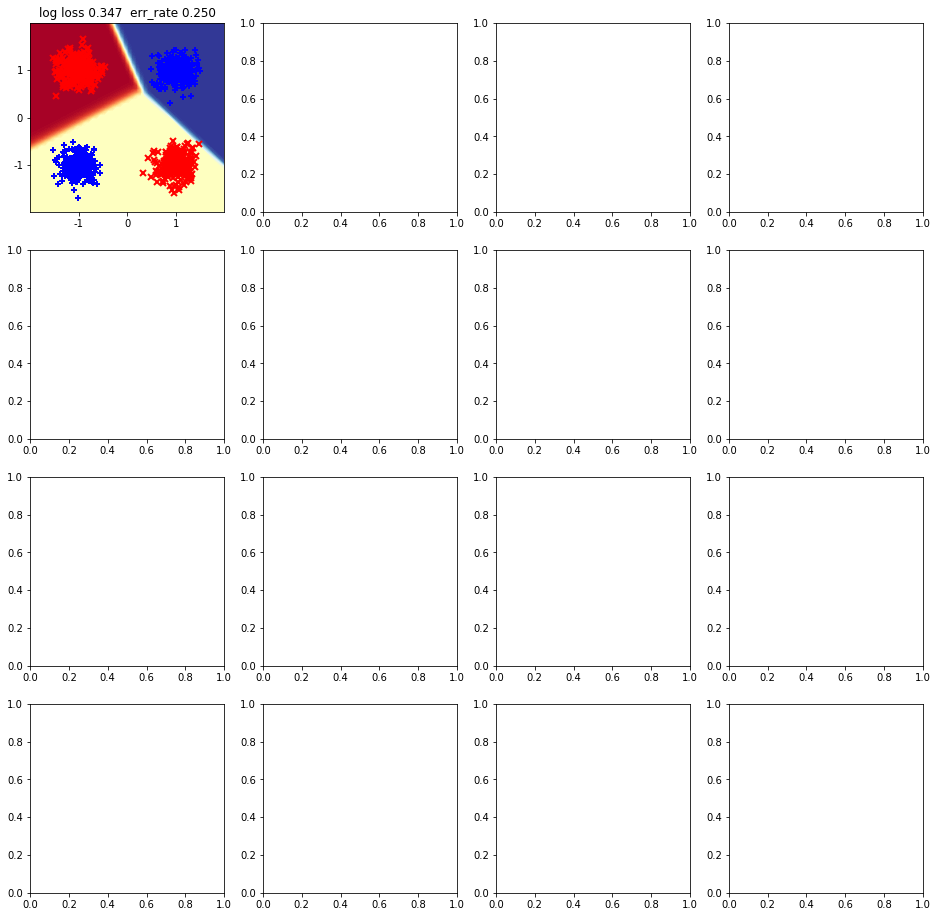

In [7]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

### 1a(ii): What fraction of runs reach 0 training error? What happens to the other runs? Describe how rapidly (or slowly) things seem to converge).

**Answer**: 

## Problem 1a: MLP size [2] with activation Logistic and L-BFGS solver


In [8]:
# TODO edit this block to run from 16 different random_states with LOGISTIC activation

# Save each run's trained classifier object in a list called mlp_logistic_lbfgs_list 


### 1b(i): Visualize probabilistic predictions in 2D feature space for LogisticSigmoid+LBFGS

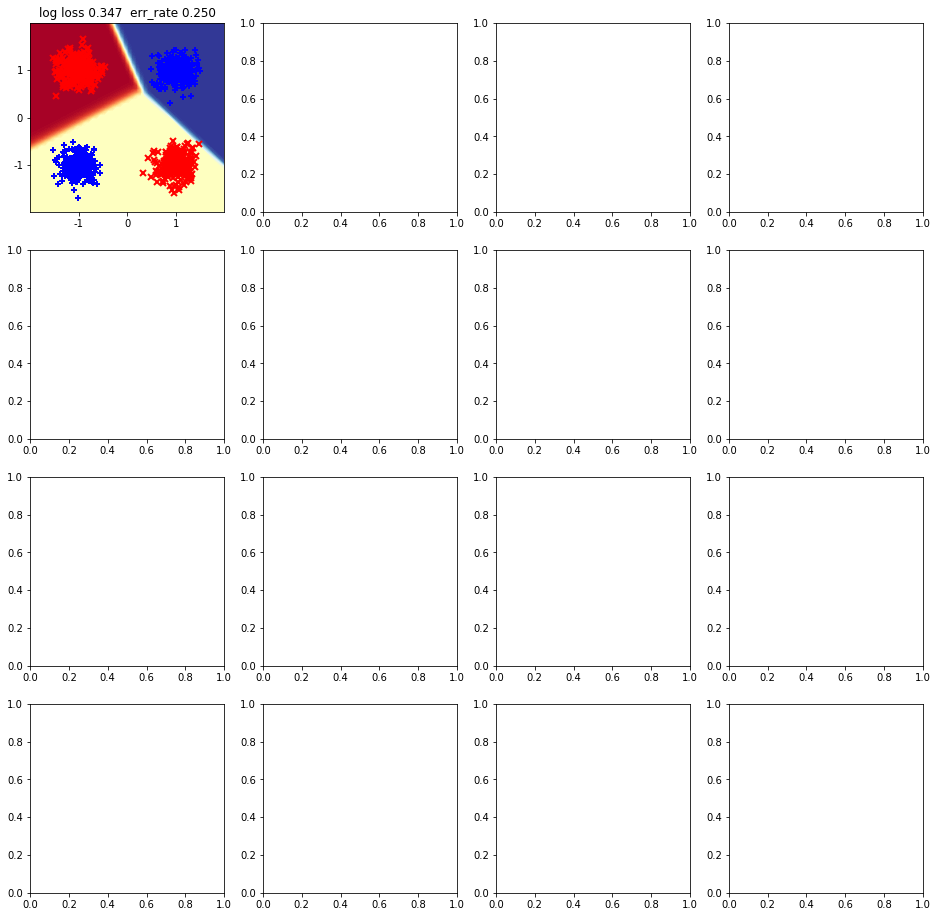

In [9]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

### 1b(ii): What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1b converge).




**Answer**: 

## Problem 1c: MLP size [2] with activation ReLU and SGD solver

In [10]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list called mlp_relu_sgd_list 

n_runs = 16
start_time_sec = time.time()
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=400, tol=1e-8,
    random_state=0,
    solver='sgd', batch_size=10,
    learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_sgd.fit(x_tr_N2, y_tr_N)
mlp_sgd.did_converge = True if len(warn_list) == 0 else False
elapsed_time_sec = time.time() - start_time_sec
print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))


finished SGD run  1/16 after    2.9 sec |  93 epochs | converged     | loss 0.348


### 1c(i): Visualize probabilistic predictions in 2D feature space for ReLU+SGD

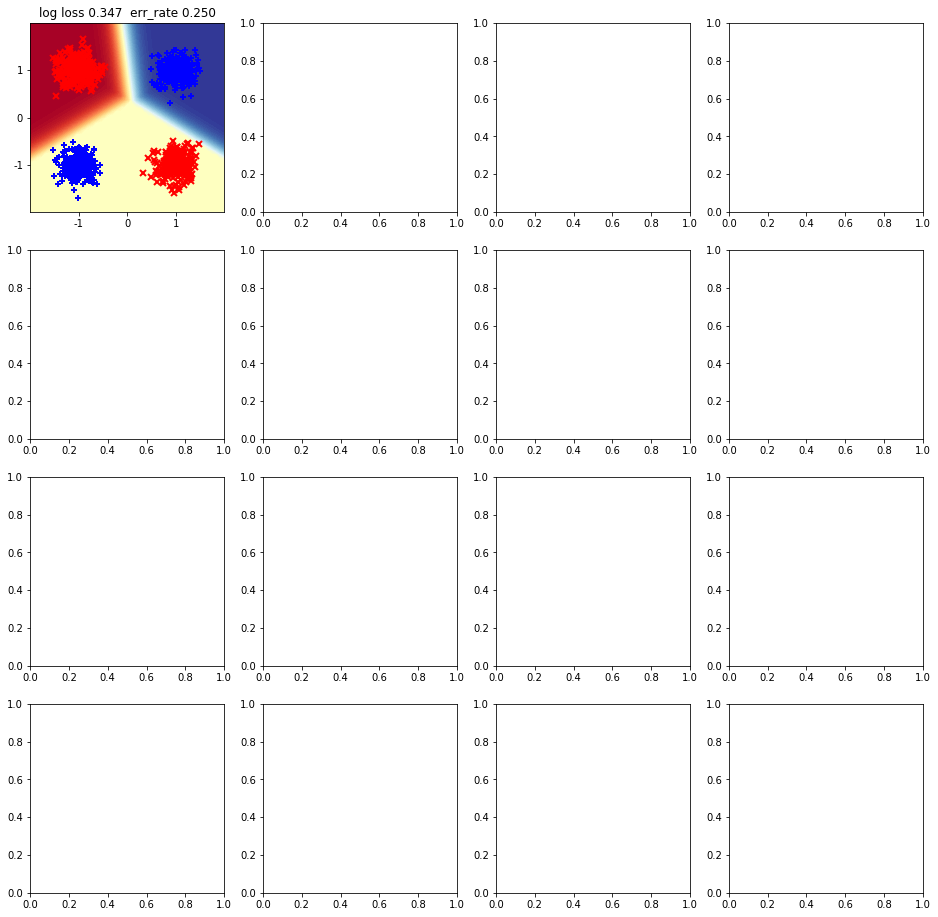

In [11]:
# TODO edit to plot all 16 runs from 1c above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

### **1c(ii):** What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1c converge).


**Answer**:

### **1c(iii):** What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in 1a (using the same ReLU activation function)?


**Answer**: 

## Problem 1d: MLP size [2] with activation Logistic and SGD solver

In [12]:
# TODO edit to do 16 runs of SGD, like in 1c but with LOGISTIC activation

### 1d(i): Visualize probabilistic predictions in 2D feature space for Logistic+SGD

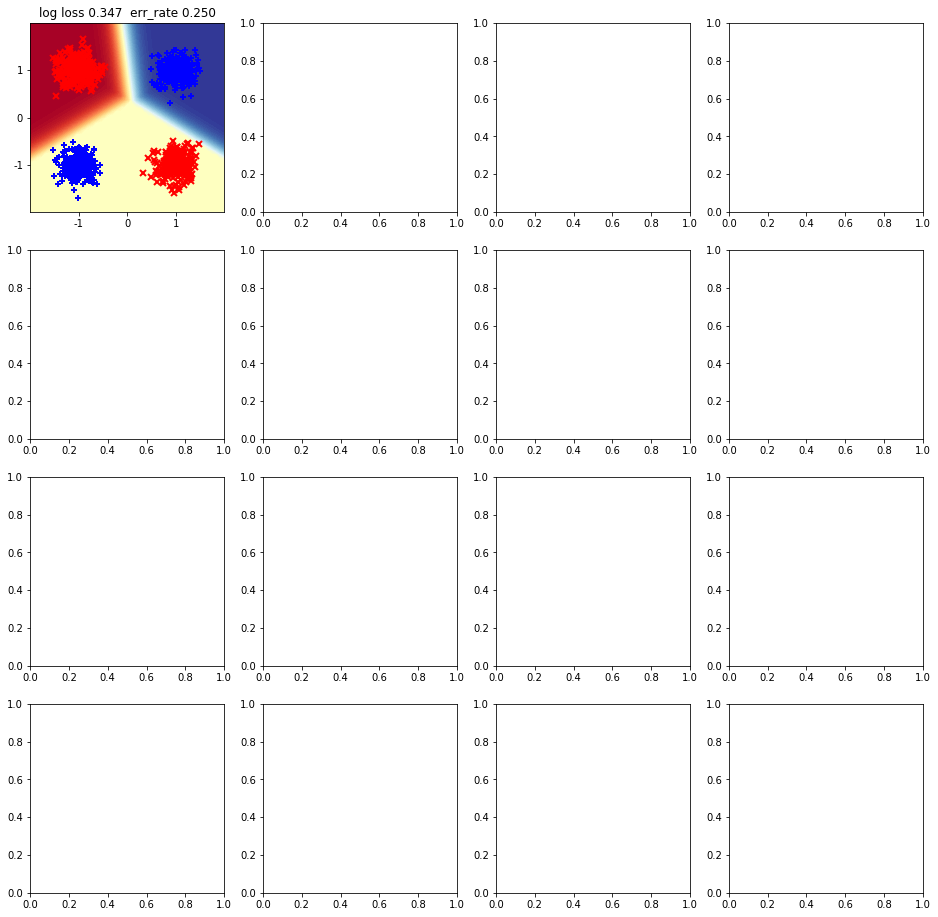

In [13]:
# TODO edit to plot all 16 runs from 1d above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

### **1d(ii):** What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1d converge).



**Answer**: 

### **1d(iii):** What is most noticeably different between this SGD run with batch size 10 and the previous L-BFGS run with logistic activations? What explanation can you provide for why this happens?


**Answer**: 

### Problem 1e: Comparing loss_curves

### **1e(i):** Plot loss_curves for each method from 1a-1d in 2 x 2 subplot grid

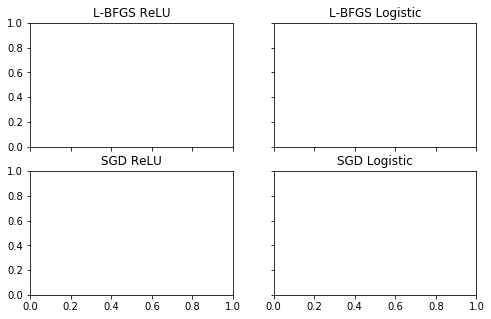

In [14]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

### **1e(ii):** From this overview plot (plus your detailed plots from 1a-1d), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?

**Answer:** 

### **1e(iii):** Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: 

### **1e(iv):** list 2 reasons to prefer L-BFGS over SGD, and 2 reasons to prefer SGD over L-BFGS.

**Answer**: 


### **1e(v):** list 2 reasons to prefer ReLU over logistic, and 2 reasons to prefer Logistic Sigmoid over ReLU

**Answer**:
